In [119]:
from mpmath import *
import matplotlib.pyplot as plt
import numpy as np

In [125]:
# function to expand
def f(x):
  return log(x)

# point of expansion
x0 = 1

# pade series orders
n = 10
m = 10

In [126]:
a = taylor(f, x0, n+m+1)
p, q = pade(a, n, m)

In [127]:
def fa(x):
  return polyval(p[::-1], x-x0)/polyval(q[::-1], x-1)

In [128]:
def stringify(p, v):
  nom = [str(p[0])]
  term = '('+v+'-'+str(x0)+')'
  for i in range(1,len(p)):
    nom.append(str(p[i]) + '*'+ term+'^' + str(i))
  return '+'.join(nom)

In [129]:
stringify(p, '(1-c)')

'0.0+1.0*((1-c)-1)^1+4.49989824587848*((1-c)-1)^2+8.49081559313295*((1-c)-1)^3+8.71861198702169*((1-c)-1)^4+5.28840582083041*((1-c)-1)^5+1.92397686743184*((1-c)-1)^6+0.406962576893115*((1-c)-1)^7+0.0459296114400872*((1-c)-1)^8+0.00229612887471531*((1-c)-1)^9+3.16917432803896e-5*((1-c)-1)^10'

In [130]:
x = np.arange(1e-5,1,1e-3)
y = np.log(x)
ya = fa(x)

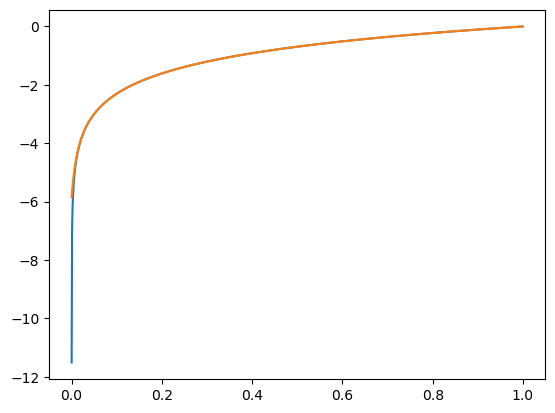

In [131]:
plt.plot(x,y)
plt.plot(x,ya)